### Conducted by: Ivy Ly
### binhnhily.ivy@outlook.com.au

In [13]:
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

# Dataset and Exploratory Analysis

In [14]:
trainDf = pd.read_csv('data/training.csv')
testDf = pd.read_csv('data/testing.csv')
#trainDf = pd.read_csv('data/training.csv', index_col='date', parse_dates=True)
print(trainDf.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
4  2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

      T3       RH_3         T4  ...  Press_mm_hg  RH_out  Windspeed  \
0  19.79  44.730000  19.000000  ...        733.5    92.0   7.000000   
1  19.79  44.790000  19.000000  ...        733.6    92.0   6.666667   
2  19.79  44.933333  18.926667  ...        733.7    92.0   6.333333   
3  19.79  45.000000  18.890000  ...        733.9    92.0   5.666667   
4  19.79  44.933333  18.890000  ...        734.0    92.0   5.333333   

   Visibility  Tdewpoint        rv1        rv2    NSM  WeekStatus  Day_of_week  
0   6

In [5]:
print(trainDf.shape)
print(testDf.shape)

(14803, 32)
(4932, 32)


In [6]:
trainDf.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [4]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14803 non-null  object 
 1   Appliances   14803 non-null  int64  
 2   lights       14803 non-null  int64  
 3   T1           14803 non-null  float64
 4   RH_1         14803 non-null  float64
 5   T2           14803 non-null  float64
 6   RH_2         14803 non-null  float64
 7   T3           14803 non-null  float64
 8   RH_3         14803 non-null  float64
 9   T4           14803 non-null  float64
 10  RH_4         14803 non-null  float64
 11  T5           14803 non-null  float64
 12  RH_5         14803 non-null  float64
 13  T6           14803 non-null  float64
 14  RH_6         14803 non-null  float64
 15  T7           14803 non-null  float64
 16  RH_7         14803 non-null  float64
 17  T8           14803 non-null  float64
 18  RH_8         14803 non-null  float64
 19  T9  

In [7]:
trainDf.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [15]:
import datetime 
from datetime import timedelta, date

In [16]:
trainDf['date'] =  pd.to_datetime(trainDf['date'])
testDf['date'] =  pd.to_datetime(testDf['date'])

In [11]:
trainDf['date'].head()

0   2016-01-11 17:00:00
1   2016-01-11 17:10:00
2   2016-01-11 17:20:00
3   2016-01-11 17:40:00
4   2016-01-11 17:50:00
Name: date, dtype: datetime64[ns]

In [17]:
trainDf = trainDf.set_index('date')
testDf = testDf.set_index('date')

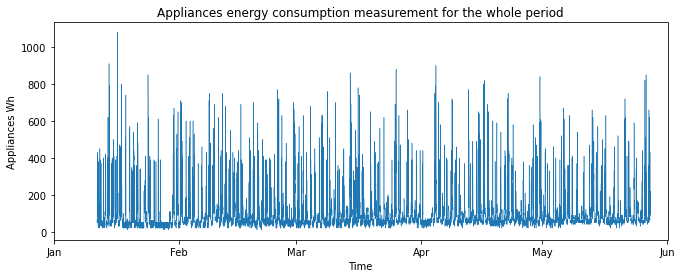

In [18]:

# Create figure and plot space
fig, ax = plt.subplots(figsize=(11, 4))

# Add x-axis and y-axis
# Set title and labels for axes
#ax.set(xlabel="Time", ylabel="Appliances Wh",title="Appliances energy consumption measurement for the whole period")
ax.plot(trainDf['Appliances'],linewidth=0.5)
ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2016,6, 1)])
date_form = DateFormatter("%b")
# Define the date format
ax.xaxis.set_major_formatter(date_form)

# Set title and labels for axes
ax.set(xlabel="Time",
       ylabel="Appliances Wh",
       title="Appliances energy consumption measurement for the whole period")
plt.show()

The energy consumption profile shows a high variability from Jan-2016 to Jun-2016

In [8]:
#Selecting data for the first week
firstWeekDf = trainDf[trainDf.index < '2016-01-18 17:00:00']
firstWeekDf.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-18 16:00:00,50,0,19.29,41.40,18.200,41.400,19.566667,40.590000,18.79,38.200000,...,756.800000,70.0,2.0,40.000000,-5.400000,19.164170,19.164170,57600,Weekday,Monday
2016-01-18 16:10:00,50,0,19.29,41.40,18.200,41.400,19.550000,40.672500,18.79,38.200000,...,756.766667,72.0,2.0,38.166667,-5.166667,47.749400,47.749400,58200,Weekday,Monday
2016-01-18 16:20:00,50,0,19.29,41.29,18.175,41.475,19.566667,40.700000,18.70,38.163333,...,756.733333,74.0,2.0,36.333333,-4.933333,5.917829,5.917829,58800,Weekday,Monday
2016-01-18 16:30:00,40,0,19.29,41.29,18.100,41.500,19.600000,40.590000,18.70,38.090000,...,756.700000,76.0,2.0,34.500000,-4.700000,1.955003,1.955003,59400,Weekday,Monday
2016-01-18 16:50:00,50,0,19.29,41.29,18.100,41.560,19.566667,40.626667,18.70,38.060000,...,756.633333,80.0,2.0,30.833333,-4.233333,28.924128,28.924128,60600,Weekday,Monday


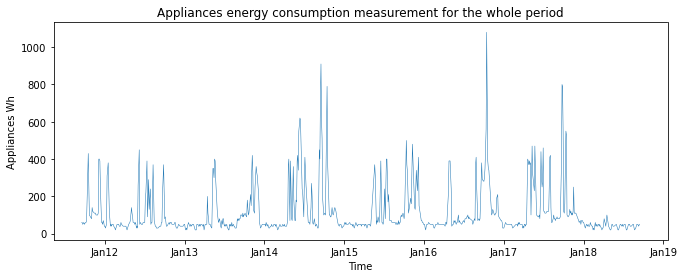

In [93]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(11, 4))

# Add x-axis and y-axis

ax.plot(firstWeekDf['Appliances'],linewidth=0.5)
#x.set_xlim([datetime.date(2016, 1, 11), datetime.date(2016,1, 19)])
date_form = DateFormatter("%b%d")
# Define the date format
ax.xaxis.set_major_formatter(date_form)
# Set title and labels for axes
ax.set(xlabel="Time",
       ylabel="Appliances Wh",
       title="Appliances energy consumption measurement for the whole period")
plt.show()

The energy consumption profile shows a high variability between days of the week

In [19]:
distributionDf = trainDf[trainDf['Appliances'] <= 8000]

Text(0.5, 1.0, 'Appliances energy consumption distribution')

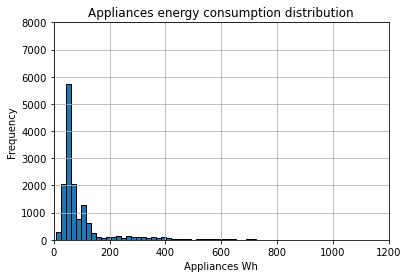

In [20]:
distributionDf['Appliances'].hist(density = 0, bins=60, edgecolor='black')
plt.xlim(0,1200)
plt.ylim(0,8000)
plt.xlabel('Appliances Wh')
plt.ylabel('Frequency')
plt.title('Appliances energy consumption distribution')


The data distribution has a long tail.

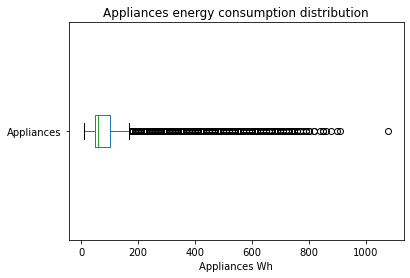

In [27]:
distributionDf['Appliances'].plot.box(vert=False)
plt.xlabel('Appliances Wh')
plt.title("Appliances energy consumption distribution")
plt.show()

The median has a value of 60 Wh. The lower whisker has a value of 10 Wh and the upper whisker has a value of 170 Wh. It also shows that the data above the median is more dispersed and that there are several outliers.

In [21]:
# PairGrid plots
from scipy import stats
import seaborn as sns

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x,y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy = (0.1, 0.9), xycoords = ax.transAxes)

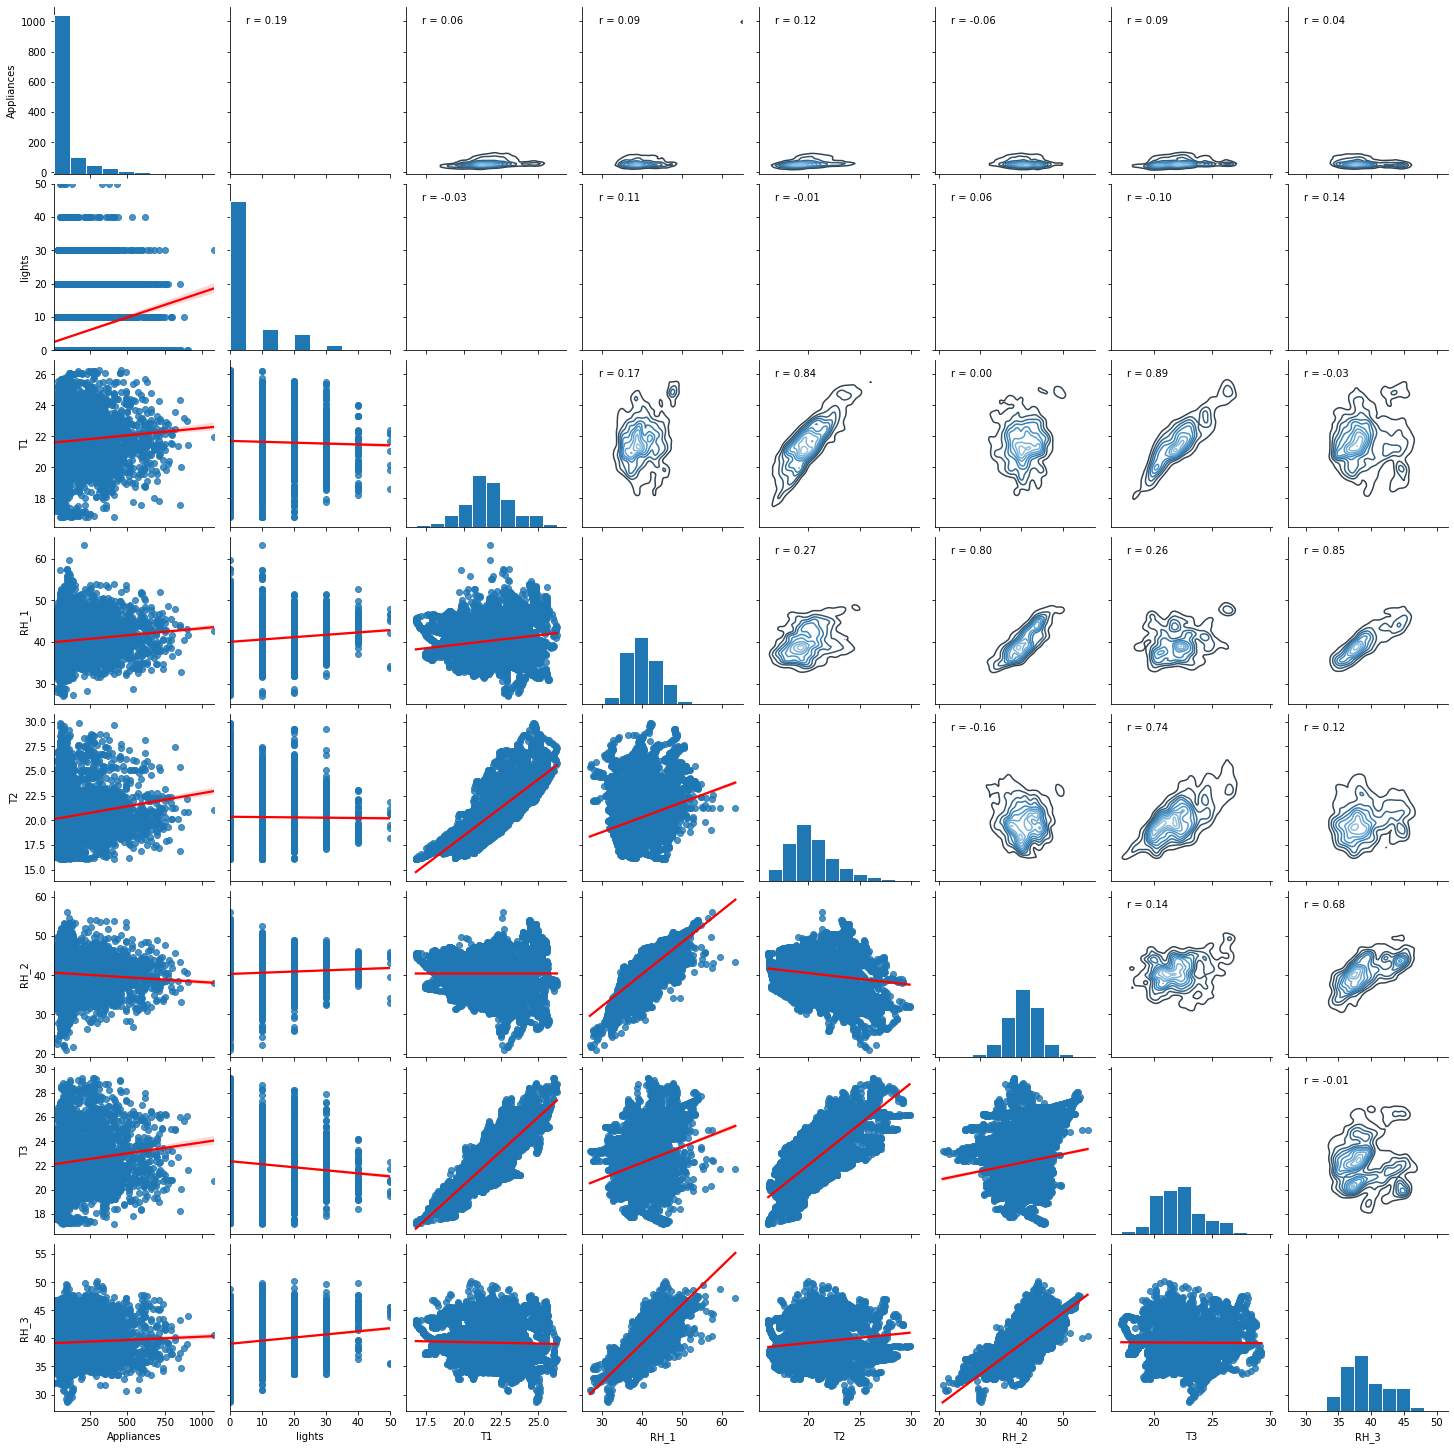

In [11]:
plots = trainDf[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2','T3', 'RH_3']]

g = sns.PairGrid(plots)
g = g.map_lower(sns.regplot, line_kws={'color': 'red'})
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corrfunc)
g.map_upper(sns.kdeplot, cmap="Blues_d")

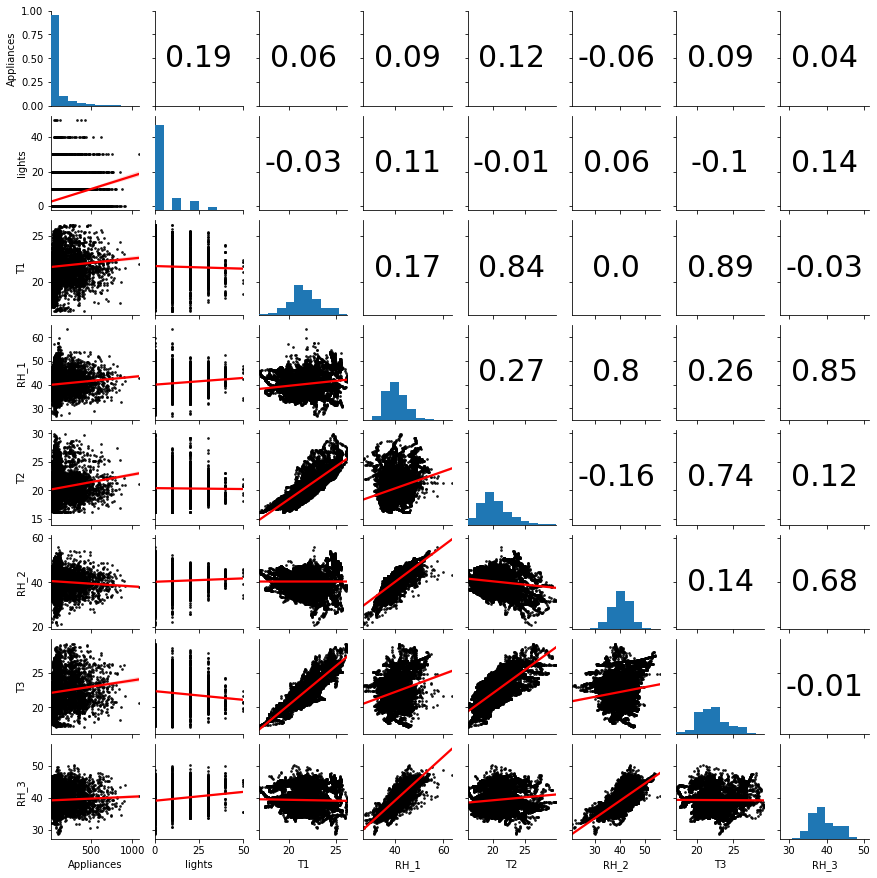

In [22]:
# Using correlation coeffs
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)
    
scatterdata = trainDf[['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2','T3', 'RH_3']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

From those pair plots, we can see: 

- The highest correlations remains between Temperature in kitchen area and Temperature in laundry room area (0.89), Temperature in kitchen area and Temperature in living room area (0.84). These would be useful for building energy modeling, measuring the most representative rooms and that might be helful for the energy prediction of appliances. 

- The relationships between the humidity in each room and the appliances’ consumption are quite clear. Humidity in the kitchen area and Appliances are positively correlated
(0.06). This could be explained by higher humidity levels in the zone when cooking and human presence. There is a positive correlation between appliances’ consumption and laundry room humidity of 0.04. This might represent the use of washing machine and/or dryer.

- Moreover, interestring positive correlations between the energy consumption of appliances and lights (0.19), between appliances and Temperature in living room area (0.12) are also observed. 

- Accordingly, we can tell information regarding temperature and humidity measurements from a wireless network is somewhat important in the enery prediction.



In [32]:
sunDf = firstWeekDf[firstWeekDf['Day_of_week']== 'Sunday']
sunDf = sunDf [['Appliances']]

monDf = firstWeekDf[firstWeekDf['Day_of_week']== 'Monday']
monDf = monDf [['Appliances']]

tueDf = firstWeekDf[firstWeekDf['Day_of_week']== 'Tuesday']
tueDf = tueDf [['Appliances']]

wedDf = firstWeekDf[firstWeekDf['Day_of_week']== 'Wednesday']
wedDf = wedDf [['Appliances']]

thuDf = firstWeekDf[firstWeekDf['Day_of_week']== 'Thursday']
thuDf = thuDf [['Appliances']]

friDf = firstWeekDf[firstWeekDf['Day_of_week']== 'Friday']
friDf = friDf [['Appliances']]

satDf = firstWeekDf[firstWeekDf['Day_of_week']== 'Saturday']
satDf = satDf [['Appliances']]

In [34]:
sunDf['hour of day'] = sunDf.index.hour
monDf['hour of day'] = monDf.index.hour
tueDf['hour of day'] = tueDf.index.hour
wedDf['hour of day'] = wedDf.index.hour
thuDf['hour of day'] = thuDf.index.hour
friDf['hour of day'] = friDf.index.hour
satDf['hour of day'] = satDf.index.hour

In [41]:
sun = sunDf.groupby('hour of day').sum()
mon = monDf.groupby('hour of day').sum()
tue = tueDf.groupby('hour of day').sum()
wed = wedDf.groupby('hour of day').sum()
thu = thuDf.groupby('hour of day').sum()
fri = friDf.groupby('hour of day').sum()
sat = satDf.groupby('hour of day').sum()

In [47]:
heatmapDf = pd.concat([sun,mon,tue,wed,thu,fri,sat], axis=1)

In [55]:
heatmapDf.columns = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat']

In [56]:
heatmapDf.head()

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
hour of day,,,,,,,
0,180,270,470,190,190,320,240
1,250,210,590,190,190,210,210
2,120,210,180,180,260,280,150
3,50,200,140,190,180,180,200
4,310,270,230,270,110,240,210


In [57]:
heatmapDf = heatmapDf.sort_index(ascending=False)

In [58]:
heatmapDf.head()

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
hour of day,,,,,,,
23,320,340,210,100,200,310,260
22,130,1540,130,760,190,790,400
21,470,520,250,1360,570,610,720
20,660,450,260,1360,660,830,340
19,420,870,220,560,670,440,2350


[Text(0.5, 0, 'Sun'),
 Text(1.5, 0, 'Mon'),
 Text(2.5, 0, 'Tue'),
 Text(3.5, 0, 'Wed'),
 Text(4.5, 0, 'Thu'),
 Text(5.5, 0, 'Fri'),
 Text(6.5, 0, 'Sat')]

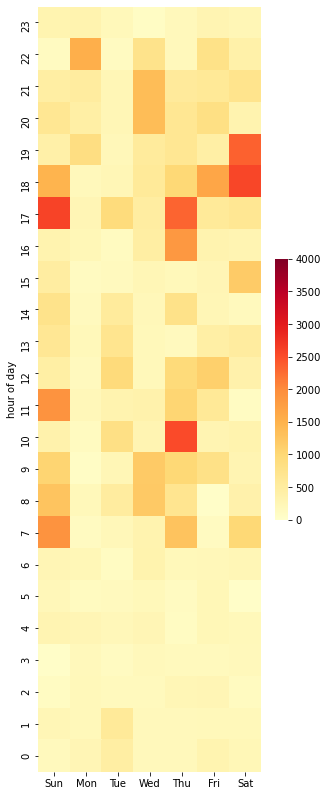

In [59]:
# Genrating "Hourly energy consumption of appliances heat map for the first week"
plt.figure(figsize = (5,16))
ax = sns.heatmap(heatmapDf, cmap = "YlOrRd", vmin = 0,
                 vmax=4000,
                 square=True,cbar_kws={"shrink": 0.3})
ax.set_xticklabels(ax.get_xticklabels())

Via an hourly heat map, patterns are identified. More specifically, the energy consumption starts to rise around 6.30 am. Then around noon, there are energy load
surges. The energy demand also strongly increases around 6 pm. However, there is no
clear pattern regarding the day of the week.

# Building Linear Regression Model

### Converting WeekStatus and Day_of_week to dummy variables

In [60]:
set(trainDf['WeekStatus'])

{'Weekday', 'Weekend'}

In [61]:
set(trainDf['Day_of_week'])

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [65]:
trainWeekStatus = pd.get_dummies(trainDf['WeekStatus'])
testWeekStatus = pd.get_dummies(testDf['WeekStatus'])


In [66]:
trainDayOfWeek = pd.get_dummies(trainDf['Day_of_week'])
testDayOfWeek = pd.get_dummies(testDf['Day_of_week'])

In [67]:
combinedTrainDf1 = trainDf.join(trainWeekStatus)
finalTrainDf = combinedTrainDf1.join(trainDayOfWeek)
combinedTestDf1 = testDf.join(testWeekStatus)
finalTestDf = combinedTestDf1.join(testDayOfWeek)
print(finalTrainDf.shape)
print(finalTrainDf.head())
print(finalTestDf.head())


(14803, 40)
                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

                        T3       RH_3         T4       RH_4  ...  Day_of_week  \
date                                                         ...                
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...       Monday   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...       Monday   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...       Monday   
2016-01-11 17:40:00  19.79  45.00000

### Modelling using all features 

In [68]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

In [69]:
finalTrainDf.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week',
       'Weekday', 'Weekend', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [70]:
# Getting data and labels for training and testing 
X_train = finalTrainDf.drop([ 'Appliances','WeekStatus','Day_of_week'], axis = 1)
y_train = finalTrainDf[ 'Appliances']

X_test = finalTestDf.drop([ 'Appliances','WeekStatus','Day_of_week'], axis = 1)
y_test = finalTestDf[ 'Appliances']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14803, 37)
(14803,)
(4932, 37)
(4932,)


In [71]:
# Source: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [72]:
# model instantiation or model initialisation
model3 = LinearRegression()

# model training
model3.fit(X_train, y_train)

# predicting on training and testing data
y_train_hat = model3.predict(X_train)
y_test_hat = model3.predict(X_test)

# Calculating scores on training and testing sets using standard regression metrics
print("Scores on training set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_hat)))
print("R2: ", r2_score(y_train, y_train_hat))
print("MAE: ", mean_absolute_error(y_train, y_train_hat))
print("MAPE: ", mean_absolute_percentage_error(y_train, y_train_hat))
print()
print("Scores on testing set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_hat)))
print("R2: ", r2_score(y_test, y_test_hat))
print("MAE: ", mean_absolute_error(y_test, y_test_hat))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_hat))

Scores on training set: 
RMSE:  93.20557248110671
R2:  0.17834376492372517
MAE:  53.138912335051806
MAPE:  61.331174880920855

Scores on testing set: 
RMSE:  93.17643426587789
R2:  0.15900712778674597
MAE:  51.98492960938022
MAPE:  59.95512561147076


This model is not a good model because in both training & testing set, the RMSE is too high while R2 is very slow. Similarly, MAE and MAPE, which are other simple metrics representing the absolute value of  the difference between the predicted value and the actual value, are high (over 50). This means that an error we can expect from the prediction on an average is big.

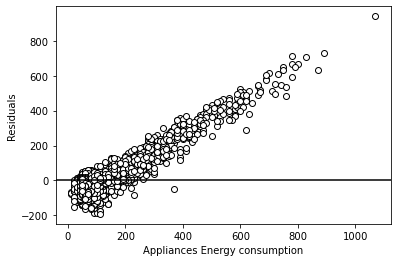

In [77]:
residual = y_test.values-y_test_hat
plt.scatter(y_test, residual, color="white", edgecolor='black')
plt.xlabel('Appliances Energy consumption')
plt.ylabel('Residuals')
plt.axhline(0, color='black')

As the residuals are not normally distributed around the horizontal axis, we can tell the  relationship between the variables and the energy consumption of appliances is not well represented by the linear model.

# Feature Importance using RFE

In [73]:
from sklearn.feature_selection import RFE

In [81]:
estimator = LinearRegression()
rmse_scores = []
for i in range(1,38):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  101.26888895164174
RMSE score on test set using 2 features:  99.12399407311729
RMSE score on test set using 3 features:  98.92249989546323
RMSE score on test set using 4 features:  97.97137950937748
RMSE score on test set using 5 features:  97.87877773888789
RMSE score on test set using 6 features:  97.79879832642702
RMSE score on test set using 7 features:  97.54264516067863
RMSE score on test set using 8 features:  97.4383034495254
RMSE score on test set using 9 features:  96.97841033120521
RMSE score on test set using 10 features:  95.04617607469439
RMSE score on test set using 11 features:  95.02193708768031
RMSE score on test set using 12 features:  94.9073006369462
RMSE score on test set using 13 features:  94.68863860202237
RMSE score on test set using 14 features:  94.70687758710378
RMSE score on test set using 15 features:  94.68431856934914
RMSE score on test set using 16 features:  94.69881903708233
RMSE score on test set using 17 fe

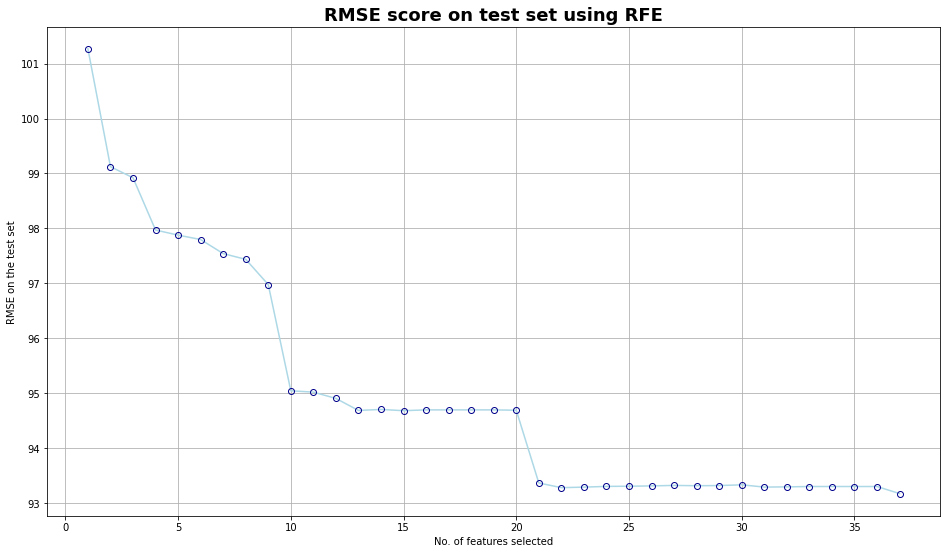

In [76]:
plt.figure(figsize=(16,9))
plt.grid()   
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18, fontweight='bold')
plt.plot(range(1, 38), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.show()

In [78]:
# RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
model = LinearRegression()
k = StratifiedKFold(n_splits=5, random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=k, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)

/Users/ivyly/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/ivyly/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [79]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 25
Best features : Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'T_out', 'Windspeed', 'Tdewpoint', 'Weekday',
       'Weekend', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')


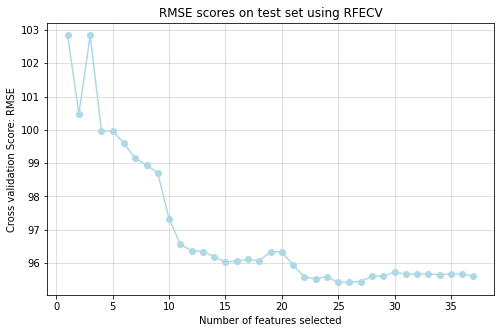

In [80]:
# Plot number of features VS. cross-validation scores RMSE
plt.figure(figsize=(8,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Score: RMSE")
plt.title('RMSE scores on test set using RFECV')

rmse_cv_scores = np.sqrt(-rfecv.grid_scores_)

p = plt.plot(range(1, len(rfecv.grid_scores_) + 1), rmse_cv_scores, marker='o', color='lightblue')
plt.grid(alpha=0.5)
plt.show()

In conclusion, although the linear model is considered not ideal for predicting the energy usage of a house with high RMSE, MAE, MAPE, and low R2. This can be because of the limitation of this project that the data was obtained from one house and the short length of continuous data. Important information could be found when analyzing several houses, and other relationships can be studied with appliances’ energy consumption in combination with: occupant’s age, number of occupants, ownership of pets, building’s geometry etc. However, via the ranked features from RFECV and the data analysis especiall including pairplots and heatmaps, this project has found:
    - From a wireless network's data, temperature and humidity measurements from the kitchen, laundry room, living room had the most important contributions. Hence, data from a wireless sensor network that measures humidity and temperature has been proven to increase the prediction accuracy.
    - On the other hand, the weather data from the nearby weather station was shown to increase the prediction accuracy. More specifically, pressure, the outdoor temperature, dew point (the temperature the air needs to be cooled to), outdoor relative humidity, wind speed, are important and also quite representative to improve the appliances energy consumption prediction.
    

